# infer cosmology

In [1]:
import os
import h5py 
import numpy as np

In [2]:
import astropy.table as aTable

In [3]:
import torch
from sbi import utils as Ut
from sbi import inference as Inference

In [4]:
import corner as DFM
# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [5]:
device = ("cuda" if torch.cuda.is_available() else "cpu")

# load $q_\phi(\theta_g\,|\,X), q_\phi(\theta_g\,|\,\theta_{\rm cosmo})$

In [6]:
dat_dir = '/tigress/chhahn/cgpop/'
qphi_thetag_X = torch.load(os.path.join(dat_dir, 'qphi.thetag_X.pt'))
qphi_thetag_thetacosmo = torch.load(os.path.join(dat_dir, 'qphi.thetag_thetacosmo.pt'))

In [16]:
qphi_thetag_thetacosmo.set_default_x([0.3, 0.8, 1., 1., 1., 1.])

DirectPosterior sampler for potential_fn=<PosteriorBasedPotential>

# load NSA

In [7]:
nsa = aTable.Table.read(os.path.join(dat_dir, 'nsa_v0_1_2.fits'))

In [8]:
absmag_nsa = np.array(nsa['ABSMAG'].data)[:,3:] # g, r, i, z
ivar_absmag_nsa = np.array(nsa['AMIVAR'].data)[:,3:]

In [13]:
cuts = (np.all((ivar_absmag_nsa[:,:-1]**-0.5 > 0.02) & (ivar_absmag_nsa[:,:-1]**-0.5 < 0.03), axis=1) * 
        (ivar_absmag_nsa[:,-1]**-0.5 > 0.03) & (ivar_absmag_nsa[:,-1]**-0.5 < 0.04))
np.sum(cuts)

/home/chhahn/.conda/envs/sbi/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in power
  """Entry point for launching an IPython kernel.
/home/chhahn/.conda/envs/sbi/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


111025

# compute posterior
$$p(\theta_{\rm cosmo}\,|\,\{X_i\}) = p(\theta_{\rm cosmo}) \prod_i^{N_g} \frac{1}{S_i} \sum\limits_j^{S_i} \frac{p(\theta_g\,|\,\theta_{\rm cosmo})}{p(\theta_g)}$$

In [16]:
def log_posterior_i(post_i, theta): 
    ''' calculate loss
    
    \sum_i^Ng w_i * \log \sum_j^Ns qphi(\theta_ij)
    
    '''
    return np.float(torch.logsumexp(qphi_thetag_thetacosmo.log_prob(torch.tensor(post_i).to(device),
                                x=torch.tensor(theta).to(device)), 0).cpu())

[-1.8824028e+01 -1.9667040e+01 -2.0003780e+01 -2.0296247e+01
  2.0097727e-02  2.0061878e-02  2.0062400e-02  3.0116091e-02]


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

/home/chhahn/.conda/envs/sbi/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/home/chhahn/.conda/envs/sbi/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


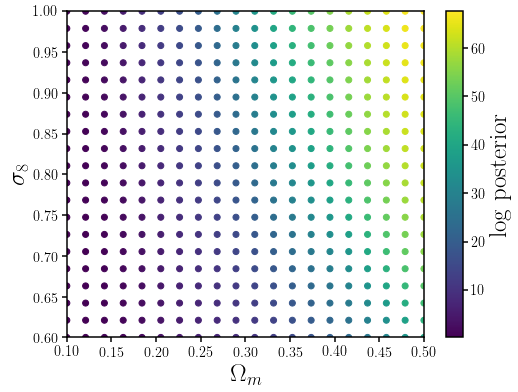

[-15.078223   -15.508064   -15.679038   -15.738412     0.02077707
   0.02065648   0.0208914    0.03474808]


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

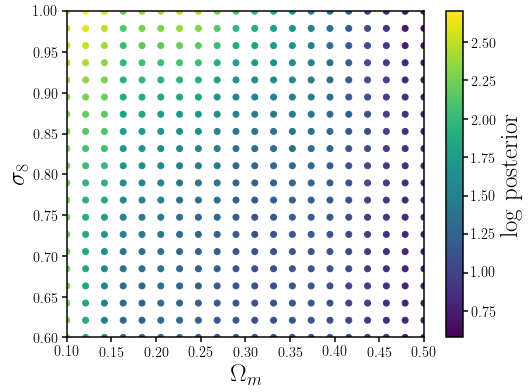

[-1.9720619e+01 -2.0400579e+01 -2.0731855e+01 -2.0986282e+01
  2.0338327e-02  2.0223573e-02  2.0228097e-02  3.0814424e-02]


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

/home/chhahn/.conda/envs/sbi/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/home/chhahn/.conda/envs/sbi/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


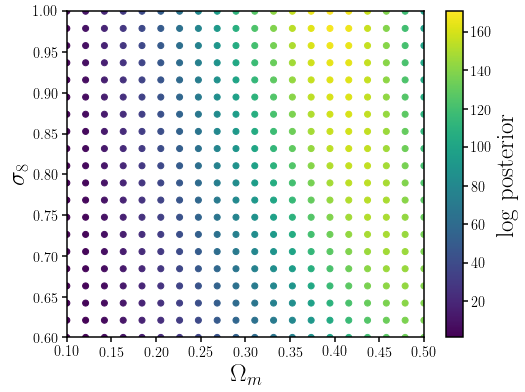

[-16.389542   -16.24224    -15.5139675  -15.631064     0.0201053
   0.0201315    0.02022061   0.03193833]


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

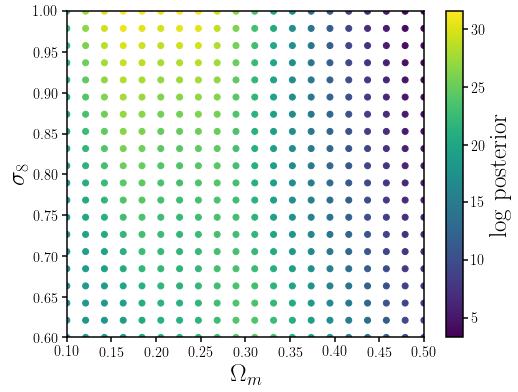

[-15.9953985  -16.360075   -16.501104   -16.618618     0.02029487
   0.0202187    0.02017449   0.03177837]


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

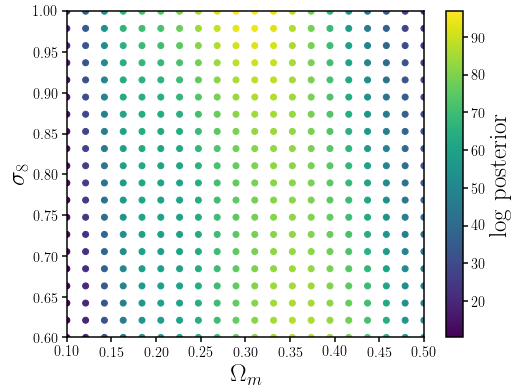

[-19.165625   -19.614649   -19.859371   -20.012217     0.02037019
   0.02023692   0.02025547   0.03092435]


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

/home/chhahn/.conda/envs/sbi/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/home/chhahn/.conda/envs/sbi/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


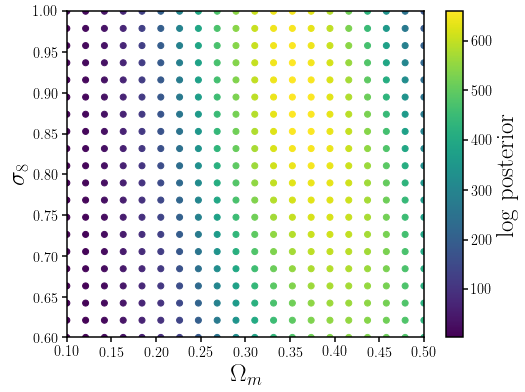

[-18.34357    -19.239254   -19.682144   -19.962948     0.02208747
   0.0208913    0.02078328   0.03248443]


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

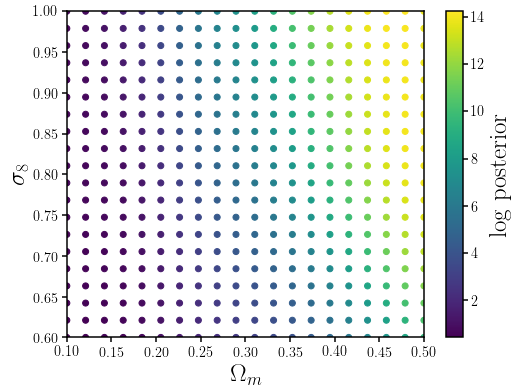

[-18.233023   -19.100115   -19.48139    -19.745104     0.02063196
   0.0203113    0.02029392   0.0306869 ]


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

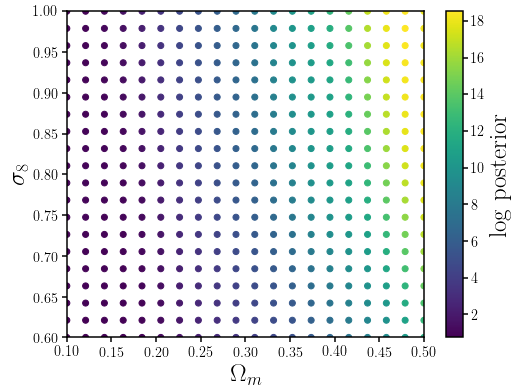

[-1.9359058e+01 -1.9952667e+01 -2.0303263e+01 -2.0516893e+01
  2.0498417e-02  2.0322561e-02  2.0300854e-02  3.0849168e-02]


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

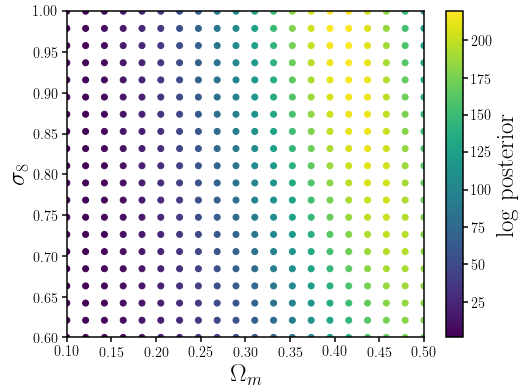

[-1.9270836e+01 -2.0070145e+01 -2.0443563e+01 -2.0727411e+01
  2.0367233e-02  2.0165646e-02  2.0163922e-02  3.0484479e-02]


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

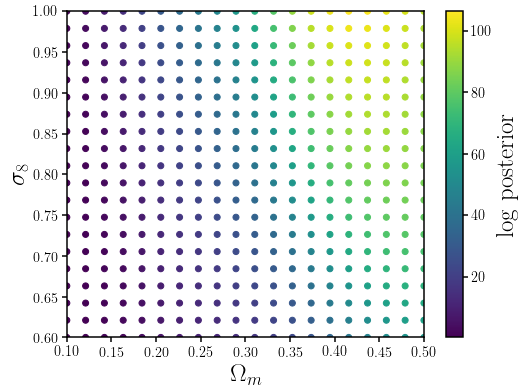

In [19]:
for igal in range(10): 
    _X = np.concatenate([absmag_nsa[cuts][igal], ivar_absmag_nsa[cuts][igal]**-0.5])
    print(_X)
    
    thetag_prime = qphi_thetag_X.sample((10000,), 
                                    x=torch.as_tensor(_X.astype(np.float32)).to(device), 
                                    show_progress_bars=True)
    
    Oms = []
    s8s = [] 
    logposts = [] 
    for om in np.linspace(0.1, 0.5, 20): 
        for s8 in np.linspace(0.6, 1., 20):
            Oms.append(om)
            s8s.append(s8)
            logposts.append(log_posterior_i(thetag_prime, [om, s8, 1., 1., 1., 1.]))

    fig = plt.figure(figsize=(8,6))
    sub = fig.add_subplot(111)
    scat = sub.scatter(np.array(Oms), np.array(s8s), c=np.exp(np.array(logposts)))
    sub.set_xlabel('$\Omega_m$', fontsize=25)
    sub.set_xlim(0.1, 0.5)
    sub.set_ylabel('$\sigma_8$', fontsize=25)
    sub.set_ylim(0.6, 1.)
    cb = plt.colorbar(scat)
    cb.set_label('log posterior', fontsize=25)            
    plt.show()